# Employee Attrition Prediction

### Importing Libraries

In [224]:
import imblearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


In [225]:
# Plot Customization
plt.figure(figsize = (15,9))
plt.style.context('bmh')

<Figure size 1080x648 with 0 Axes>

In [226]:
# Loading dataset
df = pd.read_csv("C:\\Users\\Hp\\OneDrive\\Desktop\\Project\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [227]:
# Information on dataset
print(f'The dataset has {df.shape[0]} rows for each employee and {df.shape[1]} attributes\n')
print('='*80)
print('The attrinutes and their unique values are as below\n')
for i in df.columns:
    print(f'========== {i} ==========')
    print(df[i].value_counts().sort_values(ascending=False))
    print('- -'*20)


The dataset has 1470 rows for each employee and 35 attributes

The attrinutes and their unique values are as below

========== Age ==========
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
========== Attrition ==========
No     1233
Yes     237
Name: Attrition, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
========== BusinessTravel ==========
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
========== DailyRate =======

In [228]:
# Dropping columns with little to no useful information
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [229]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

### Unencoding Categorical Features

In [230]:
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']
for i in df['Education']:
    df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df['PerformanceRating']:
    df['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df['WorkLifeBalance']:
    df['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)
for i in df[col]:
    df[i].replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'},inplace=True)

In [231]:
# Checking new values for decoded attributes 
decoded = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction',
           'Education', 'PerformanceRating', 'WorkLifeBalance']
for i in df[decoded]:
    print(f'======== {i} ========')
    print(df[i].value_counts().sort_values(ascending=False))
    print('- - ' * 20)

======== EnvironmentSatisfaction ========
High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== JobInvolvement ========
High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== JobSatisfaction ========
Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== RelationshipSatisfaction ========
High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== Education ========
Bachelor         572
Master           398
College          282
B

*JobLevel* doesn't have a description containing its values, so I'll leave them numeric, just as they've been originally collected.

### Checking for missing data

In [232]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

We can see that there is no missing values present in data

## Data Visualization and EDA

In [233]:
# Visualizing target variable classes and its distribution among the dataset
fig = px.pie(df,names = 'Attrition',title = 'Targrt Variable: Attrition')
fig.update_traces(rotation = 90,pull=[0.1],textinfo = 'percent+label')
fig.show()

proportion of Attrition, class is imbalance

To help in visualizing characteristics and try to find useful patterns, I'll create a separate dataframe containing only employees who've left the organization.

In [234]:
Attrition = df.query("Attrition == 'Yes'")
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,High,Male,...,Excellent,Medium,0,6,4,Better,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,High,Male,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,Medium,Male,...,Excellent,High,0,8,2,Better,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Bachelor,Marketing,Very High,Male,...,Excellent,Low,1,1,3,Good,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Master,Medical,Low,Male,...,Excellent,Medium,3,4,3,Best,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,College,Technical Degree,Very High,Male,...,Excellent,Very High,1,14,4,Bad,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Master,Life Sciences,Medium,Male,...,Excellent,Very High,2,12,3,Better,6,3,0,1


In [235]:
print(f"{Attrition.shape[0]} emplyees in the dataset left the company.\n")
print("Let's try to find some more information about them!")

237 emplyees in the dataset left the company.

Let's try to find some more information about them!


In [236]:
# Creating a function to plot histograms
def barplot(i):
    fig = px.histogram(Attrition,x = Attrition[i],title=f'Attrition x {i}',text_auto = 'd3-format')
    fig.show()

In [237]:
# Creating visualizations for categorical values
barplot('BusinessTravel')
barplot('Department')
barplot('Education')
barplot('EnvironmentSatisfaction')
barplot('EducationField')
barplot('Gender')
barplot('JobInvolvement')
barplot('JobSatisfaction')
barplot('WorkLifeBalance')
barplot('PerformanceRating')
barplot('JobRole')
barplot('MaritalStatus')
barplot('RelationshipSatisfaction')
barplot('OverTime')

In [238]:
# Creating a function to plot histograms on numeric features
def numeric_plot(i):
    fig = px.histogram(Attrition, x = Attrition[i],nbins=20,title = f'Attrition x {i}')
    fig.show()

In [239]:
numeric_plot('Age')
numeric_plot('DailyRate')
numeric_plot('DistanceFromHome')
numeric_plot('HourlyRate')
numeric_plot('JobLevel')
numeric_plot('MonthlyIncome')
numeric_plot('MonthlyRate')
numeric_plot('NumCompaniesWorked')
numeric_plot('PercentSalaryHike')
numeric_plot('StockOptionLevel')
numeric_plot('TotalWorkingYears')
numeric_plot('TrainingTimesLastYear')
numeric_plot('YearsAtCompany')
numeric_plot('YearsInCurrentRole')
numeric_plot('YearsSinceLastPromotion')
numeric_plot('YearsWithCurrManager')

## EDA Conclusions
#### Categorical Variables<br><br>
When analyzing categorical variables, we can see that most employees who have left worked for the **Research & Development department**, with most of them being **laboratory technicians**, **sales executives** or **research scientists**.<br><br>

It's noticable that **these employees scored excellent performance ratings**. It isn't good to lose employees with such performance levels at all!<br><br>

Most of them had a **Bachelor's degree** and their **education field** was mostly either **Life Sciences**, **Medical** and **Marketing**.<br><br>

These employee majoraly presented high job involvement, and high satisfcation with their job, and also a better work life balance, but **it's preoccupying that a large amount of them said they've had a low satisfaction with the work environment**.<br><br>



#### Numerical Variables <br><br>
Looking at the attrition per age histogram, It's noticeable that **as employees grow old, the less they tend to leave**, and most of our employee attrition is made of employees ranging from 25 to 35 years old. The data also shows that **the more working years, more years at the company, and more years in current role employees accumulate, the less likely they are to leave**.<br><br>

When it comes to income, **the majority of employees who have left were among those with the smaller monthly income**, with a monthly income varying from 2.000 to 3.000. **Those who've less percent salary hike also tend to leave** more than those with a higher percentual hike in salary. <br><br>




## Employee Attrition Prediction

After looking at our data and identifying some information on employee attrition, now we will apply some classification models to try to predict when employees are more likely to leave.

In [240]:
# Splitting Dataset
X = df.drop('Attrition', axis = 1)
y = df.Attrition

In [241]:
random_state=42
# Splitting data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1176
X test size:  294
y train size:  1176
y test size:  294


The next step is encoding all categorical variables and I'll use both the Ordinal Encoder and the One Hot Encoder to do that.

It's important to remember that **the Ordinal Encoder assumes an ordering of categories**. So, for instance, when encoding Relationship Satisfaction, **the encoding will assume that 'Low (0)' is lesser than 'Very High(3)'**.<br><br>

The One Hot Encoder, on the other way, will create new columns indicating the presence or absence of each po
ssible value for every categorical attribute in our dataset, with binary values where **0 indicates the absence of each value and 1 indicates the presence of each value**. <br><br>

Categories such as Education and Job Involvement can easily be encoded with the Ordinal Encoder since there is some sort of **hierarchy** among their values, but Department, for instance, would be better encoded with the One Hot Encoder, since there is no department lesser or more than another.

In [242]:
# Enoding categorical variables with Ordinal Encoder
OE = OrdinalEncoder()
columns_OE = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
             'JobSatisfaction','WorkLifeBalance','PerformanceRating','RelationshipSatisfaction']
X_train[columns_OE] = OE.fit_transform(X_train[columns_OE])
X_test[columns_OE] = OE.transform(X_test[columns_OE])
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,2.0,350,Research & Development,21,2.0,Technical Degree,0.0,Male,57,...,0.0,2.0,3,2,3,2.0,1,1,0,0
727,18,0.0,287,Research & Development,5,2.0,Life Sciences,2.0,Male,73,...,0.0,3.0,0,0,2,2.0,0,0,0,0
254,29,2.0,1247,Sales,20,2.0,Marketing,3.0,Male,45,...,0.0,3.0,1,10,2,2.0,3,2,0,2
1175,39,2.0,492,Research & Development,12,0.0,Medical,3.0,Male,66,...,1.0,0.0,0,7,3,2.0,5,4,1,0
1341,31,2.0,311,Research & Development,20,0.0,Life Sciences,2.0,Male,89,...,0.0,1.0,1,10,2,2.0,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2.0,750,Research & Development,28,0.0,Life Sciences,2.0,Male,46,...,0.0,3.0,2,10,3,3.0,10,9,6,8
1294,41,2.0,447,Research & Development,5,0.0,Life Sciences,2.0,Male,85,...,0.0,1.0,0,11,3,0.0,3,2,1,2
860,22,1.0,1256,Research & Development,3,4.0,Life Sciences,0.0,Male,48,...,0.0,2.0,1,1,5,2.0,0,0,0,0
1459,29,2.0,1378,Research & Development,13,2.0,Other,3.0,Male,46,...,0.0,1.0,1,10,2,2.0,4,3,0,3


In [243]:
# Transforming bicategoric variables into binary values
X_train['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X_test['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X_train['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)
X_test['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)

In [244]:
X_train.OverTime.value_counts()

0    837
1    339
Name: OverTime, dtype: int64

In [245]:
X_test.Gender.value_counts()

1    175
0    119
Name: Gender, dtype: int64

In [246]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,2.0,350,Research & Development,21,2.0,Technical Degree,0.0,1,57,...,0.0,2.0,3,2,3,2.0,1,1,0,0
727,18,0.0,287,Research & Development,5,2.0,Life Sciences,2.0,1,73,...,0.0,3.0,0,0,2,2.0,0,0,0,0
254,29,2.0,1247,Sales,20,2.0,Marketing,3.0,1,45,...,0.0,3.0,1,10,2,2.0,3,2,0,2
1175,39,2.0,492,Research & Development,12,0.0,Medical,3.0,1,66,...,1.0,0.0,0,7,3,2.0,5,4,1,0
1341,31,2.0,311,Research & Development,20,0.0,Life Sciences,2.0,1,89,...,0.0,1.0,1,10,2,2.0,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2.0,750,Research & Development,28,0.0,Life Sciences,2.0,1,46,...,0.0,3.0,2,10,3,3.0,10,9,6,8
1294,41,2.0,447,Research & Development,5,0.0,Life Sciences,2.0,1,85,...,0.0,1.0,0,11,3,0.0,3,2,1,2
860,22,1.0,1256,Research & Development,3,4.0,Life Sciences,0.0,1,48,...,0.0,2.0,1,1,5,2.0,0,0,0,0
1459,29,2.0,1378,Research & Development,13,2.0,Other,3.0,1,46,...,0.0,1.0,1,10,2,2.0,4,3,0,3


### Enoding categorical variables with One Hot Encoder

In [247]:
OHE = OneHotEncoder(handle_unknown='ignore',sparse = False)
columns_OHE = ['Department','EducationField', 'JobRole', 'MaritalStatus']
X_train_cols = pd.DataFrame(OHE.fit_transform(X_train[columns_OHE]))
X_test_cols = pd.DataFrame(OHE.transform(X_test[columns_OHE]))

# Putting index back
X_train_cols.index = X_train.index
X_test_cols.index = X_test.index
# Removing categorical columns
num_X_train = X_train.drop([col for col in X_train.columns if X_train[col].dtype == "object"], axis = 1)
num_X_test = X_test.drop([col for col in X_test.columns if X_test[col].dtype == "object"], axis = 1)
# Adding one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train,X_train_cols ],axis = 1)
X_test = pd.concat([num_X_test, X_test_cols], axis = 1)

In [248]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,11,12,13,14,15,16,17,18,19,20
1097,24,2.0,350,21,2.0,0.0,1,57,2.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,18,0.0,287,5,2.0,2.0,1,73,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
254,29,2.0,1247,20,2.0,3.0,1,45,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1175,39,2.0,492,12,0.0,3.0,1,66,0.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1341,31,2.0,311,20,0.0,2.0,1,89,0.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2.0,750,28,0.0,2.0,1,46,3.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,41,2.0,447,5,0.0,2.0,1,85,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,22,1.0,1256,3,4.0,0.0,1,48,2.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1459,29,2.0,1378,13,2.0,3.0,1,46,2.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [249]:
# Rescaling Data
Scaler = MinMaxScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X_train[Scaling_Cols] = Scaler.fit_transform(X_train[Scaling_Cols])
X_test[Scaling_Cols] = Scaler.transform(X_test[Scaling_Cols])
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,11,12,13,14,15,16,17,18,19,20
1097,0.142857,2.0,0.177905,0.714286,2.0,0.0,1,0.385714,2.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,0.000000,0.0,0.132712,0.142857,2.0,2.0,1,0.614286,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
254,0.261905,2.0,0.821377,0.678571,2.0,3.0,1,0.214286,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1175,0.500000,2.0,0.279770,0.392857,0.0,3.0,1,0.514286,0.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1341,0.309524,2.0,0.149928,0.678571,0.0,2.0,1,0.842857,0.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.404762,2.0,0.464849,0.964286,0.0,2.0,1,0.228571,3.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,0.547619,2.0,0.247489,0.142857,0.0,2.0,1,0.785714,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.095238,1.0,0.827834,0.071429,4.0,0.0,1,0.257143,2.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1459,0.261905,2.0,0.915352,0.428571,2.0,3.0,1,0.228571,2.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [250]:
# Changing y values
print(y_train.value_counts())
print(y_test.value_counts())

No     978
Yes    198
Name: Attrition, dtype: int64
No     255
Yes     39
Name: Attrition, dtype: int64


In [251]:
y_train.replace({'No':0,
                'Yes':1}, inplace = True)
y_test.replace({'No':0,
                'Yes':1}, inplace = True)

In [252]:
print(y_train.value_counts())
print(y_test.value_counts())

0    978
1    198
Name: Attrition, dtype: int64
0    255
1     39
Name: Attrition, dtype: int64


We've seen before that **our target variable is unbalanced**, with much more 'No' values than 'Yes'.<br><br>

I'll use **SMOTE to synthetically create more 'Yes' values and have a 50/50 distribution** for both classes during training. I prefer to oversample our minor class than undersampling the major class because I believe that **undersampling may cause a loss of relevant data**

In [253]:
random_state=42
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train,y_train)

In [254]:
y_train.value_counts()

0    978
1    978
Name: Attrition, dtype: int64

## Logistic Regression

0.7108843537414966


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

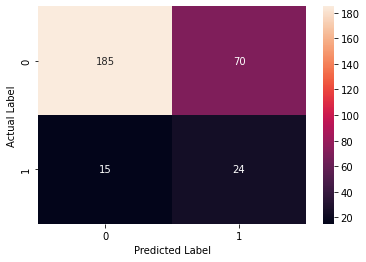

In [255]:
logistic_regression_classifier=LogisticRegression()
logistic_regression_classifier.fit(X_train,y_train)
y_pred = logistic_regression_classifier.predict(X_test)
ls_accuracy = accuracy_score(y_test,y_pred)
print(ls_accuracy)

cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Decision Tree

0.7653061224489796


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

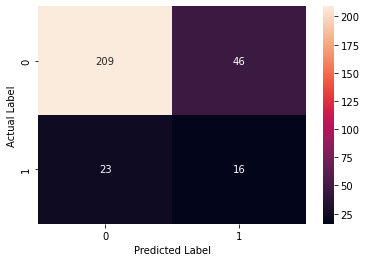

In [256]:
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')
decision_tree_classifier.fit(X_train,y_train)
y_pred = decision_tree_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test,y_pred)
print(dt_accuracy)

cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Random Forest

0.8673469387755102


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

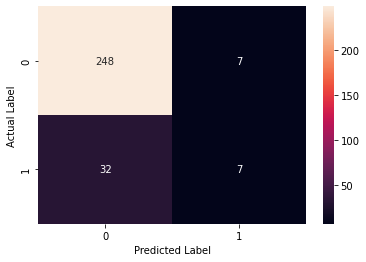

In [257]:
random_forest_classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
random_forest_classifier.fit(X_train,y_train)
y_pred=random_forest_classifier.predict(X_test)
rf_accuracy=accuracy_score(y_test,y_pred)
print(rf_accuracy)

cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## AdaBoost 

0.8571428571428571


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

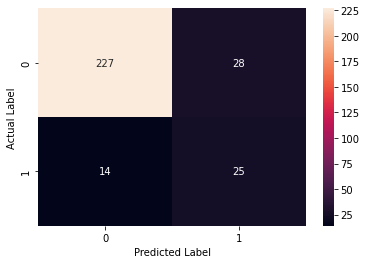

In [258]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100)
adaboost_classifier.fit(X_train,y_train)
y_pred = adaboost_classifier.predict(X_test)
ab_accuracy = accuracy_score(y_test,y_pred)
print(ab_accuracy)

cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Gradient Boosting

0.8843537414965986


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

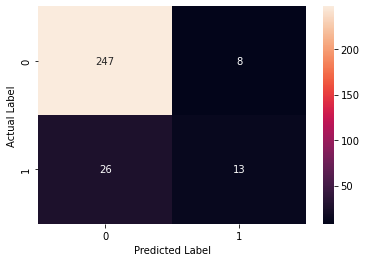

In [259]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100)
gradient_boosting_classifier.fit(X_train,y_train)
y_pred = gradient_boosting_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test,y_pred)
print(gb_accuracy)

cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## XGBoost

0.8707482993197279


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

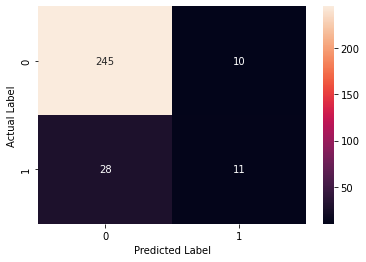

In [260]:
xg_boost_classifier = XGBClassifier()
xg_boost_classifier.fit(X_train,y_train)
y_pred = xg_boost_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_pred)
print(xgb_accuracy)

cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Accuracy Table

In [261]:
data ={'Models':['Logistic Regression','Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost'],
       'Accuracy':[ls_accuracy,dt_accuracy,rf_accuracy,ab_accuracy,gb_accuracy,xgb_accuracy]}
accuracies=pd.DataFrame(data,index=[1,2,3,4,5,6])
accuracies

,Models,Accuracy
1,Logistic Regression,0.710884
2,Decision Tree,0.765306
3,Random Forest,0.867347
4,AdaBoost,0.857143
5,Gradient Boosting,0.884354
6,XGBoost,0.870748


### Conclusion

Gradient Boosting had a better accuracy score (88.43%), making more correct predictions for both classes than any other model. 